In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycaret.regression import setup, compare_models

# Load dataset
df = pd.read_csv("merged_stock_prices.csv")  # Change filename if needed
print(df.head())
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort data by Date and Stock
df = df.sort_values(by=['Stock', 'Date'])

# Select a single stock for analysis (e.g., AAPL)
stock_to_analyze = "AAPL"
df = df[df["Stock"] == stock_to_analyze].copy()

         Date        Open        High         Low       Close   Adj Close  \
0  2019-12-31  325.410004  326.570007  323.320007  325.760010  323.833313   
1  2020-01-02  328.549988  333.350006  327.700012  333.320007  331.348572   
2  2020-01-03  330.630005  334.890015  330.299988  332.760010  330.791901   
3  2020-01-06  329.299988  334.859985  327.880005  333.739990  331.766083   
4  2020-01-07  334.260010  344.190002  330.709991  337.279999  335.285156   

    Volume Stock  
0  4958800    BA  
1  4544400    BA  
2  3875900    BA  
3  5355000    BA  
4  9898600    BA  


In [5]:
!pip install yfinance pandas matplotlib seaborn numpy scikit-learn statsmodels pycaret

  Using cached pycaret-3.3.2-py3-none-any.whl.metadata (17 kB)
  Using cached pandas-2.1.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached scipy-1.11.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pyod-2.0.3.tar.gz (169 kB)
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from google.colab import files

uploaded = files.upload()

Saving merged_stock_prices.csv to merged_stock_prices.csv


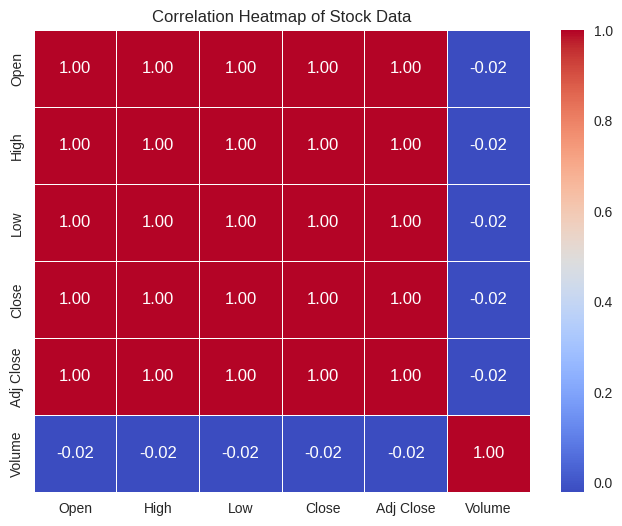

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure seaborn is imported before usage

# Load the stock data
file_path = "merged_stock_prices.csv"  # Update with your file path
df = pd.read_csv(file_path)

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Ensure column names are properly stripped of whitespace
df.columns = df.columns.str.strip()

# Define numerical columns for correlation analysis
numerical_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Check if all required columns exist before computing correlation
missing_cols = [col for col in numerical_columns if col not in df.columns]
if missing_cols:
    raise KeyError(f"Missing columns in dataset: {missing_cols}")

# Compute correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Stock Data")
plt.show()

In [5]:
# Calculate daily return
df['Daily Return'] = df['Close'].pct_change()  # Percentage change from previous day

# Create moving averages
df['MA_10'] = df['Close'].rolling(window=10).mean()
df['MA_50'] = df['Close'].rolling(window=50).mean()

# Create lagged return for prediction
df['Lagged_Return'] = df['Daily Return'].shift(1)

# Drop missing values from rolling & lag features
df.dropna(inplace=True)

# Reset index
df = df.reset_index(drop=True)

# Rename Columns for PyCaret Compatibility
df.rename(columns={
    'Date': 'Date',
    'Close': 'Price',
    'Daily Return': 'Daily_Return',
    'MA_10': 'MA_10',
    'MA_50': 'MA_50',
    'Lagged_Return': 'Lagged_Return'
}, inplace=True)

# Display structure of final dataset
print("\nFinal DataFrame Structure:\n", df.head())



Final DataFrame Structure:
         Date       Open       High        Low      Price  Adj Close  \
0 2020-03-12  63.985001  67.500000  62.000000  62.057499  60.601879   
1 2020-03-13  66.222504  69.980003  63.237499  69.492500  67.862480   
2 2020-03-16  60.487499  64.769997  60.000000  60.552502  59.132195   
3 2020-03-17  61.877499  64.402496  59.599998  63.215000  61.732239   
4 2020-03-18  59.942501  62.500000  59.279999  61.667500  60.221043   

      Volume Stock  Daily_Return     MA_10     MA_50  Lagged_Return  
0  418474000  AAPL     -0.098755  70.53375  76.53010      -0.034731  
1  370732000  AAPL      0.119808  70.64900  76.45170      -0.098755  
2  322423600  AAPL     -0.128647  69.23400  76.16100       0.119808  
3  324056000  AAPL      0.043970  68.32250  75.93815      -0.128647  
4  300233600  AAPL     -0.024480  66.92075  75.67250       0.043970  


In [6]:
# Run PyCaret AutoML
exp = setup(df, target='Daily_Return', session_id=42, verbose=False)

# Find the best regression model automatically
best_model = compare_models()

# Print best model
print("\nBest Model Selected by PyCaret:", best_model)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0135,0.0004,0.0197,0.4065,0.0177,3.2468,0.5430
br,Bayesian Ridge,0.0135,0.0005,0.0203,0.3916,0.0181,2.7598,0.0530
ridge,Ridge Regression,0.0134,0.0004,0.0202,0.3653,0.0179,2.9612,0.0720
dummy,Dummy Regressor,0.0222,0.0010,0.0304,-0.0776,0.0271,1.5480,0.0510
en,Elastic Net,0.0227,0.0011,0.0311,-0.1309,0.0268,1.9810,0.0940
llar,Lasso Least Angle Regression,0.0227,0.0011,0.0311,-0.1309,0.0268,1.9810,0.0550
omp,Orthogonal Matching Pursuit,0.0227,0.0011,0.0311,-0.1309,0.0268,1.9810,0.0560
lasso,Lasso Regression,0.0227,0.0011,0.0311,-0.1309,0.0268,1.9810,0.0540
rf,Random Forest Regressor,0.0225,0.0011,0.0318,-0.1867,0.0228,1.8152,0.2330
par,Passive Aggressive Regressor,0.0228,0.0011,0.0314,-0.2241,0.0244,2.2833,0.0530


Processing:   0%|          | 0/81 [00:00<?, ?it/s]


Best Model Selected by PyCaret: LinearRegression(n_jobs=-1)


In [8]:
from pycaret.regression import create_model, predict_model

# Create the best selected model
final_model = create_model(best_model)

# Make predictions
predictions = predict_model(final_model, data=df)

# Display predictions
print("\nPredictions:\n", predictions[['Date', 'Daily_Return', 'Label']])


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0091,0.0002,0.0145,0.5148,0.0106,0.8756
1,0.0133,0.0004,0.0211,0.7815,0.0196,0.5944
2,0.0133,0.0004,0.0206,0.5507,0.0196,0.5745
3,0.0147,0.0004,0.0207,0.6876,0.0180,3.3138
4,0.0150,0.0006,0.0243,-1.2503,0.0231,12.6143
5,0.0102,0.0001,0.0122,0.6971,0.0118,7.5849
6,0.0197,0.0008,0.0291,0.2733,0.0264,2.2678
7,0.0097,0.0001,0.0117,0.6619,0.0096,1.3423
8,0.0169,0.0006,0.0246,0.6048,0.0224,2.7096


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0117,0.0003,0.0166,0.6761,0.0151,2.3315


KeyError: "['Label'] not in index"

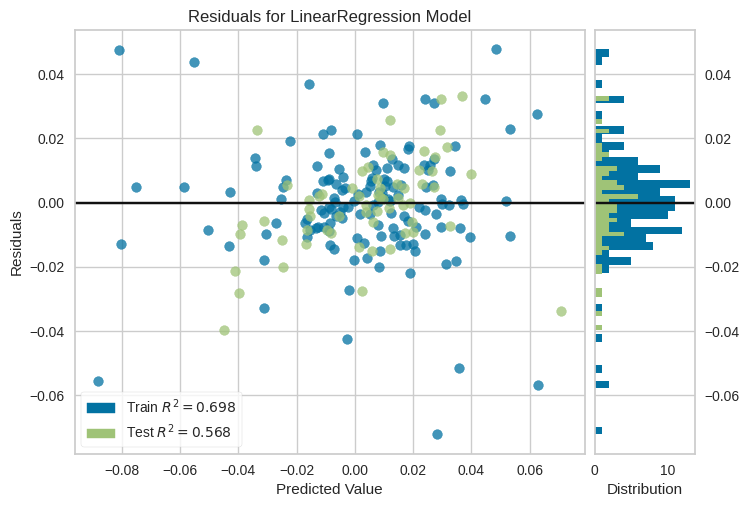

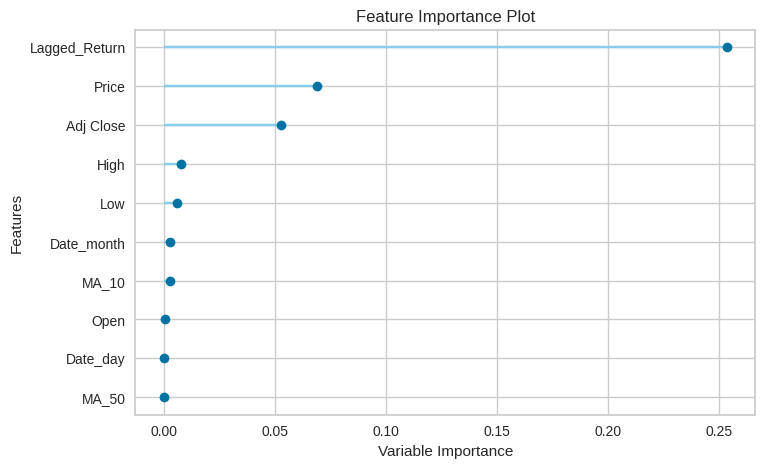

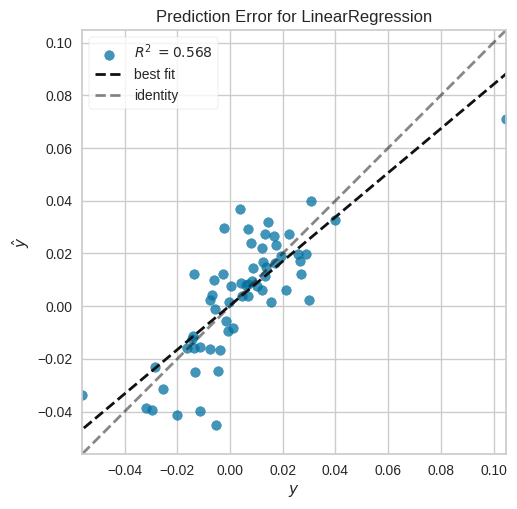

In [9]:
from pycaret.regression import plot_model

# Residual plot
plot_model(final_model, plot="residuals")

# Feature Importance
plot_model(final_model, plot="feature")

# Predicted vs Actual
plot_model(final_model, plot="error")
